# Qualitative_Bankruptcy database

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset and understand the features and target variable. 4 points

In [2]:
Bankruptcy_df = pd.read_csv("Qualitative_Bankruptcy.data.txt")

In [3]:
Bankruptcy_df.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [4]:
Bankruptcy_df.shape

(249, 7)

In [5]:
# Check for missing value
Bankruptcy_df.isna().sum()

P      0
P.1    0
A      0
A.1    0
A.2    0
P.2    0
NB     0
dtype: int64

In [6]:
# Check for missing value
Bankruptcy_df.isnull().sum()

P      0
P.1    0
A      0
A.1    0
A.2    0
P.2    0
NB     0
dtype: int64

In [7]:
Bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
P      249 non-null object
P.1    249 non-null object
A      249 non-null object
A.1    249 non-null object
A.2    249 non-null object
P.2    249 non-null object
NB     249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB


In [8]:
for col in Bankruptcy_df.columns:
    print("Unique value of {}".format(col))
    print(Bankruptcy_df[col].unique())
    print("\n")

Unique value of P
['N' 'A' 'P']


Unique value of P.1
['N' 'A' 'P']


Unique value of A
['A' 'P' 'N']


Unique value of A.1
['A' 'P' 'N']


Unique value of A.2
['A' 'P' 'N']


Unique value of P.2
['N' 'A' 'P']


Unique value of NB
['NB' 'B']




In [9]:
# Check any special character present in dataframe

In [10]:
from string import punctuation
lst = list(punctuation)
Bankruptcy_df.isin(lst).any()

P      False
P.1    False
A      False
A.1    False
A.2    False
P.2    False
NB     False
dtype: bool

In [11]:
# Check for duplication

In [12]:
Bankruptcy_df[Bankruptcy_df.duplicated()]

,P,P.1,A,A.1,A.2,P.2,NB
14,N,N,A,P,A,N,NB
59,A,A,A,P,P,A,NB
64,A,A,N,P,P,P,NB
68,P,A,P,N,P,N,NB
70,P,P,A,P,P,P,NB
78,A,P,N,P,A,P,NB
80,A,P,A,P,A,P,NB
81,A,P,P,P,P,P,NB
83,A,P,A,A,A,P,NB
85,N,P,N,P,P,A,NB


In [13]:
# Duplicate data is present, hence dropping duplicate rows.

In [14]:
Bankruptcy_df.drop_duplicates(inplace=True)
Bankruptcy_df.shape

(103, 7)

# 2. Encode independent features. 4 points

In [15]:
ind_feature = ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']

In [16]:
ind_feature

['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']

#### Apply Label Encoding

In [17]:
from sklearn import preprocessing

In [18]:
Le = preprocessing.LabelEncoder()

In [19]:
Bankruptcy_df["P"] = Le.fit_transform(Bankruptcy_df["P"])
Bankruptcy_df["P.1"] = Le.fit_transform(Bankruptcy_df["P.1"])
Bankruptcy_df["A"] = Le.fit_transform(Bankruptcy_df["A"])
Bankruptcy_df["A.1"] = Le.fit_transform(Bankruptcy_df["A.1"])
Bankruptcy_df["A.2"] = Le.fit_transform(Bankruptcy_df["A.2"])
Bankruptcy_df["P.2"] = Le.fit_transform(Bankruptcy_df["P.2"])

#### After label encoding we need to create dummy variable for all categorical variable. Here dummy varibale is created for independent variables.
#### sklearn.preprocessing.OneHotEncoder can also be used here.

In [20]:
Bankruptcy_df = pd.get_dummies(Bankruptcy_df, columns=ind_feature)

In [21]:
Bankruptcy_df.head()

,NB,P_0,P_1,P_2,P.1_0,P.1_1,P.1_2,A_0,A_1,A_2,A.1_0,A.1_1,A.1_2,A.2_0,A.2_1,A.2_2,P.2_0,P.2_1,P.2_2
0,NB,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,NB,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,NB,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,NB,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,NB,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0


In [22]:
Bankruptcy_df.shape

(103, 19)

# 3. Separate the dependant variable from the rest of the train data 2 point

In [23]:
X = Bankruptcy_df.drop(["NB"], axis=1)
Y = Bankruptcy_df["NB"]

In [24]:
X.head()

,P_0,P_1,P_2,P.1_0,P.1_1,P.1_2,A_0,A_1,A_2,A.1_0,A.1_1,A.1_2,A.2_0,A.2_1,A.2_2,P.2_0,P.2_1,P.2_2
0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0


# 4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

# 5. Apply PCA on the independent features of train data. 2 point

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()

In [29]:
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [30]:
X_pca.shape

(82, 18)

In [31]:
X_pca = pd.DataFrame(X_pca)

In [32]:
pca.explained_variance_ratio_

array([1.80962974e-01, 1.36926038e-01, 1.27006705e-01, 1.03438744e-01,
       9.92786977e-02, 8.04700723e-02, 7.20880111e-02, 6.24465188e-02,
       4.95025805e-02, 4.58734998e-02, 2.75192216e-02, 1.44869366e-02,
       7.06840474e-33, 5.94347198e-33, 4.21380459e-33, 9.06205544e-34,
       5.61321724e-34, 8.46816636e-35])

# 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points

In [33]:
# all pca components
pca.components_

array([[-1.29879918e-01,  2.59670217e-01, -1.29790299e-01,
        -8.63693360e-02,  3.24729760e-01, -2.38360424e-01,
        -1.97257330e-01,  3.98180516e-01, -2.00923187e-01,
        -1.99815422e-01,  3.17326744e-01, -1.17511322e-01,
        -1.55243790e-01,  3.97935734e-01, -2.42691944e-01,
        -2.14983781e-02,  2.28495002e-01, -2.06996624e-01],
       [-3.56241614e-01,  3.56200180e-01,  4.14341566e-05,
        -4.17619412e-01,  3.26871586e-01,  9.07478259e-02,
        -5.58896009e-02, -2.82373982e-01,  3.38263583e-01,
         4.12653501e-02, -1.92437790e-01,  1.51172440e-01,
        -5.62333264e-03, -1.40387505e-01,  1.46010838e-01,
        -2.44823320e-01,  3.05292549e-01, -6.04692298e-02],
       [ 1.83940144e-01,  3.18160419e-02, -2.15756186e-01,
         1.76190469e-01, -8.14268580e-02, -9.47636111e-02,
        -3.12818622e-01,  8.57520908e-02,  2.27066531e-01,
        -2.36622551e-01, -1.06336942e-01,  3.42959493e-01,
        -3.81363670e-01, -6.90539912e-02,  4.50417661e

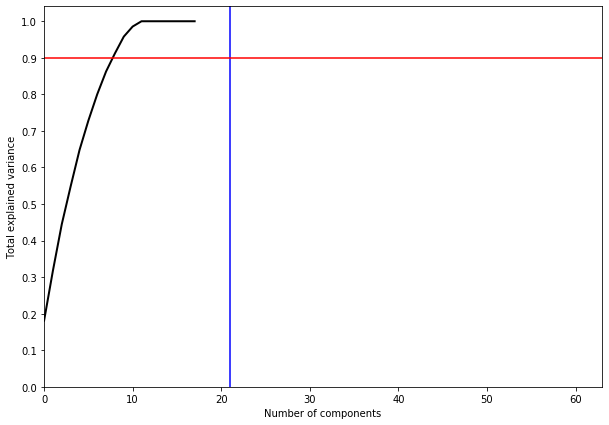

In [34]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [35]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
print("Number of components required for explaing 95% of varicance: {}".format(d))

Number of components required for explaing 95% of varicance: 10


From above plotted elbow method and from pca.explained_variance_ratio_ it can be concluded that 10 pca components is able to explain 95% variance.

# 7. Transform the data using PCA ( select optimum number of PCs). 4 points

In [36]:
reduced_pca = PCA(n_components=10)
X_train_pca = reduced_pca.fit_transform(X_train)

In [37]:
reduced_pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
reduced_pca.explained_variance_ratio_

array([0.18096297, 0.13692604, 0.1270067 , 0.10343874, 0.0992787 ,
       0.08047007, 0.07208801, 0.06244652, 0.04950258, 0.0458735 ])

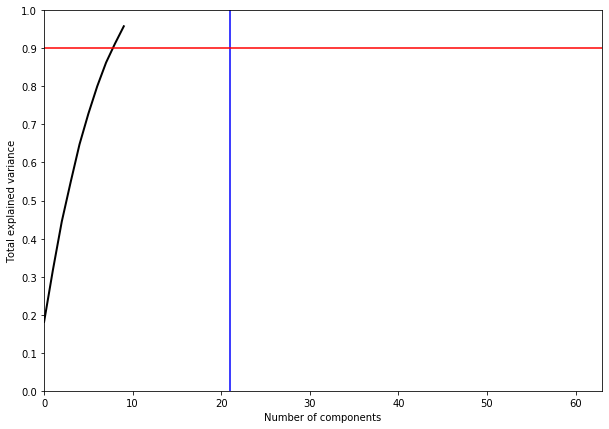

In [39]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(reduced_pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [40]:
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.566095,-0.480976,-0.168070,0.872024,-0.445059,-0.312315,1.132519,-0.725667,-0.462625,0.563489
1,2.035878,0.233886,-0.176572,0.109622,-0.074935,-0.081212,0.165831,-0.282048,0.073360,-0.036294
2,0.059296,0.976739,-0.145843,-0.343804,0.208474,-1.250909,-0.424598,0.533587,-0.683303,-0.204607
3,0.147328,0.077655,1.051326,-0.316294,0.120719,0.026585,0.447094,-0.087111,0.861216,1.292629
4,1.268742,-0.082527,-0.034391,0.647286,-0.178048,0.503242,0.216876,0.824578,0.663189,0.641761


In [41]:
X_train_pca.shape

(82, 10)

# 8. Apply KMeans algorithm on the above transformed data. 6 points

In [42]:
from sklearn.cluster import KMeans

In [43]:
cluster_error = []
cluster_range = range(1,11)

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init=5, max_iter=500)
    clusters.fit(X_train_pca)
    centorid = clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)

cluster_df = pd.DataFrame({"num_cluster":cluster_range, "cluster_error": cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,305.062624
1,2,260.781167
2,3,228.765070
3,4,201.890955
4,5,189.135880
5,6,179.923545
6,7,166.271041
7,8,157.546686
8,9,149.973310
9,10,143.986200


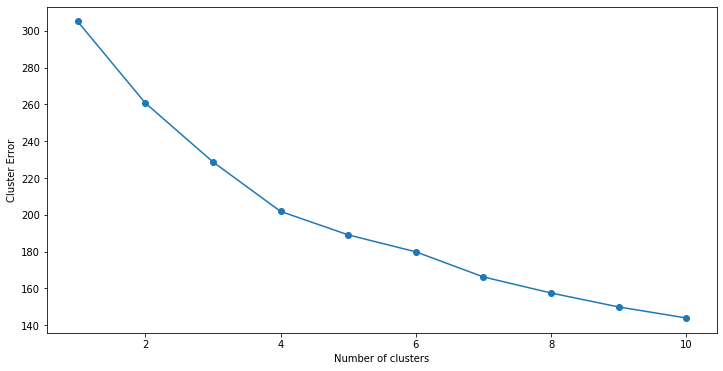

In [44]:
# plot cluster error
plt.figure(figsize=(12,6))
plt.plot(cluster_df["num_cluster"], cluster_df["cluster_error"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Cluster Error")
plt.show()

# 9. Select optimal number of clusters and form clusters out of the train data. 10 points

### For finding optimal number of clusters we can use elbow and silhouette score 

In [45]:
# Number of cluster and cluster error
cluster_df = pd.DataFrame({"num_cluster":cluster_range, "cluster_error": cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,305.062624
1,2,260.781167
2,3,228.765070
3,4,201.890955
4,5,189.135880
5,6,179.923545
6,7,166.271041
7,8,157.546686
8,9,149.973310
9,10,143.986200


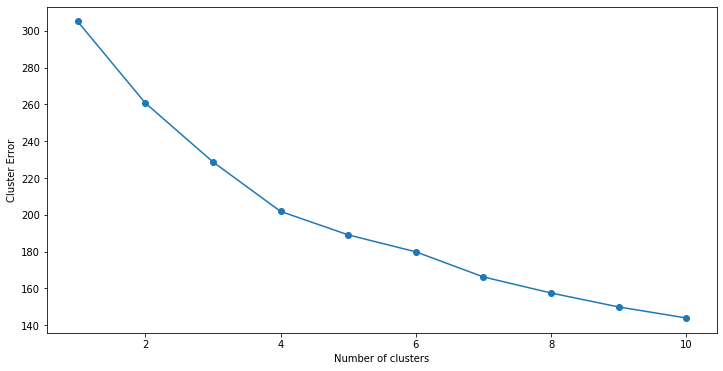

In [46]:
# Elbow method
plt.figure(figsize=(12,6))
plt.plot(cluster_df["num_cluster"], cluster_df["cluster_error"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Cluster Error")
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.15284755782508072
For n_clusters = 2 Number of negative silhouette_score is : 5


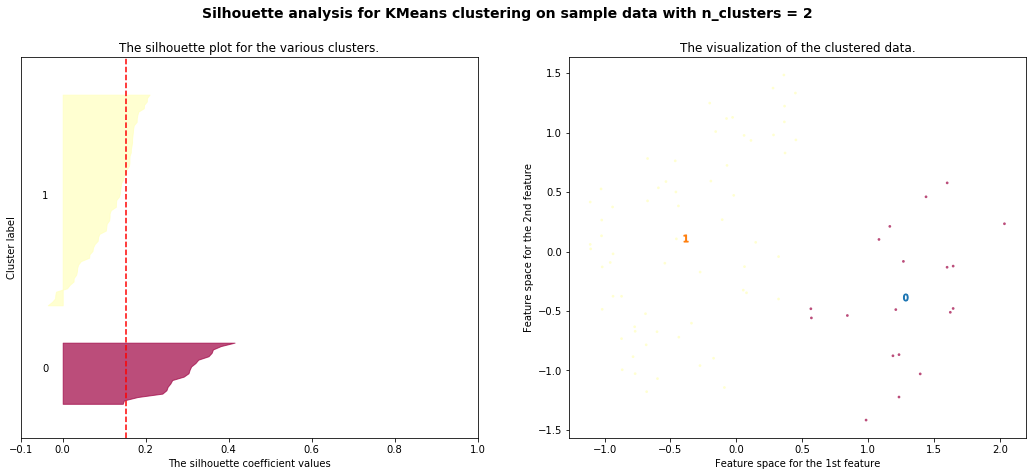

For n_clusters = 3 The average silhouette_score is : 0.14830039245431725
For n_clusters = 3 Number of negative silhouette_score is : 2


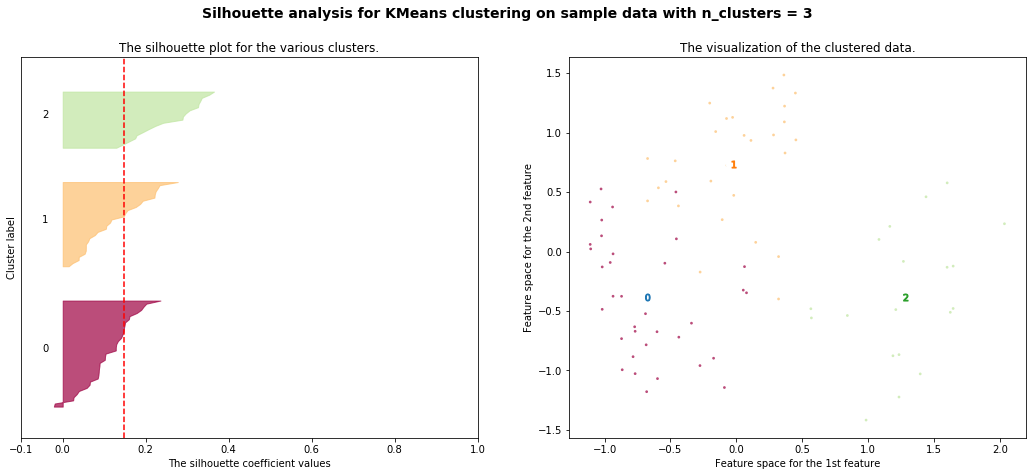

For n_clusters = 4 The average silhouette_score is : 0.15766757096031822
For n_clusters = 4 Number of negative silhouette_score is : 4


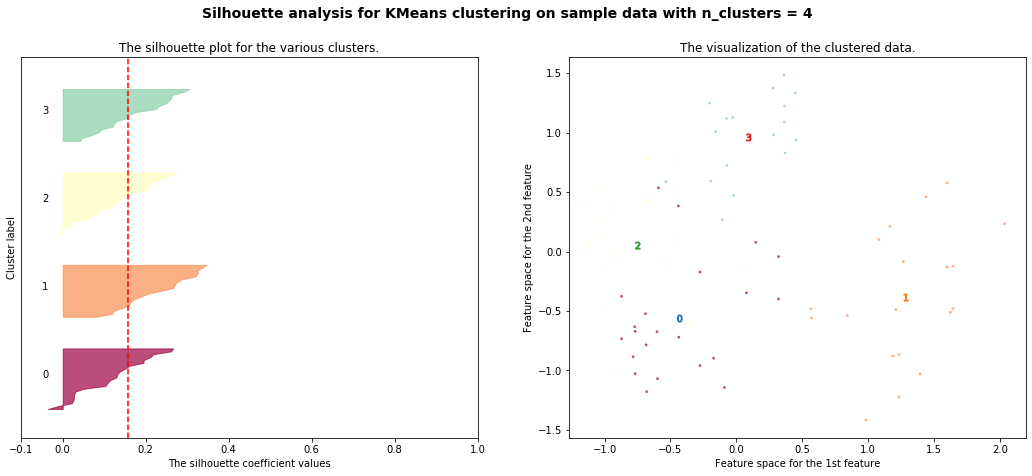

For n_clusters = 5 The average silhouette_score is : 0.14736103226972208
For n_clusters = 5 Number of negative silhouette_score is : 5


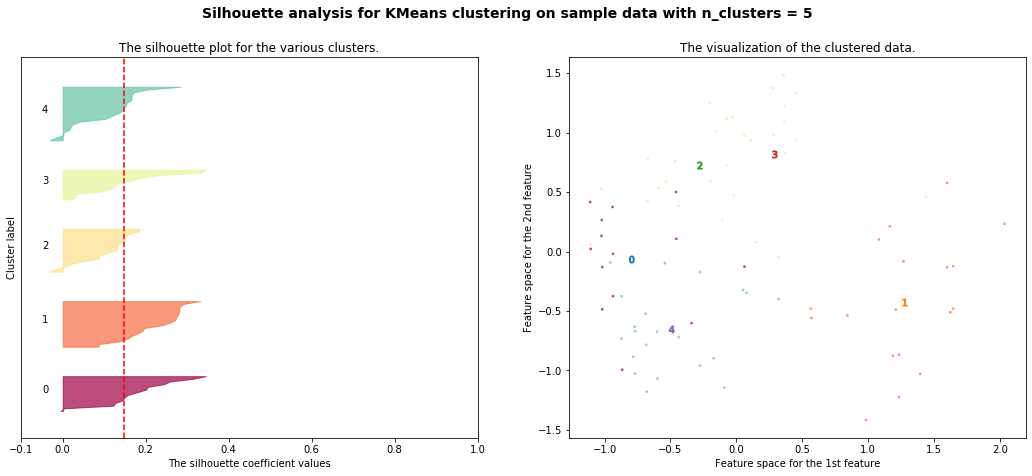

For n_clusters = 6 The average silhouette_score is : 0.14827868209702164
For n_clusters = 6 Number of negative silhouette_score is : 6


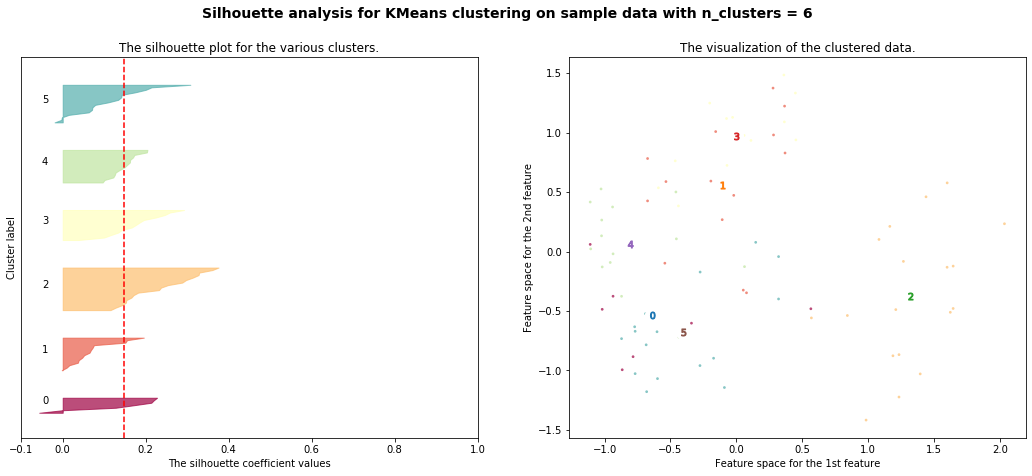

For n_clusters = 7 The average silhouette_score is : 0.12896483588983004
For n_clusters = 7 Number of negative silhouette_score is : 11


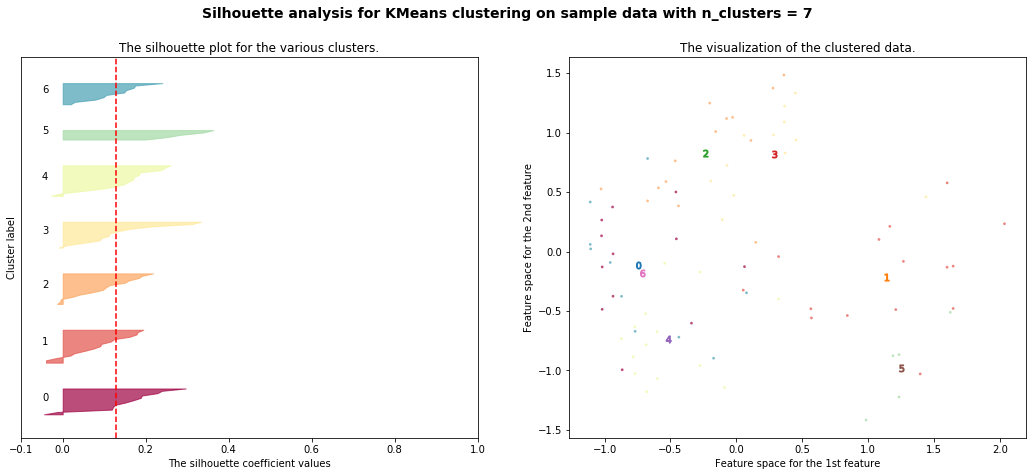

For n_clusters = 8 The average silhouette_score is : 0.14756901056642396
For n_clusters = 8 Number of negative silhouette_score is : 5


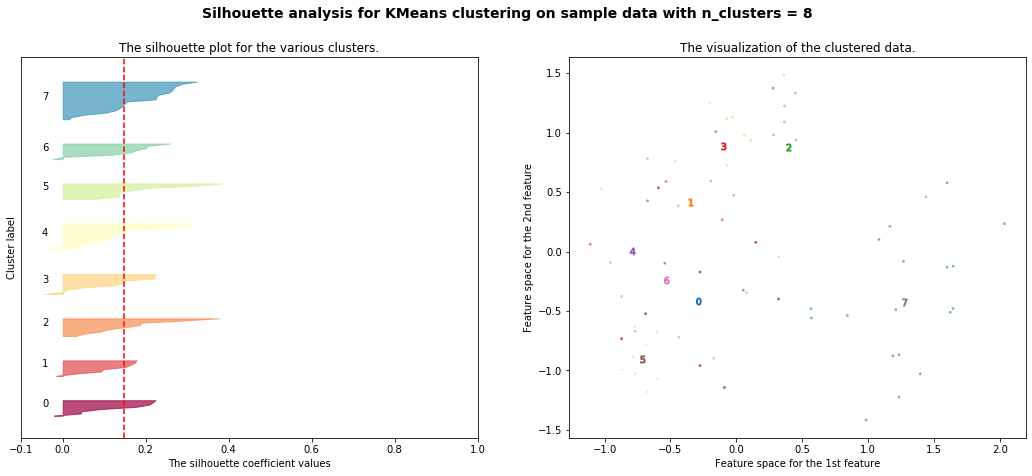

For n_clusters = 9 The average silhouette_score is : 0.1278594505308295
For n_clusters = 9 Number of negative silhouette_score is : 9


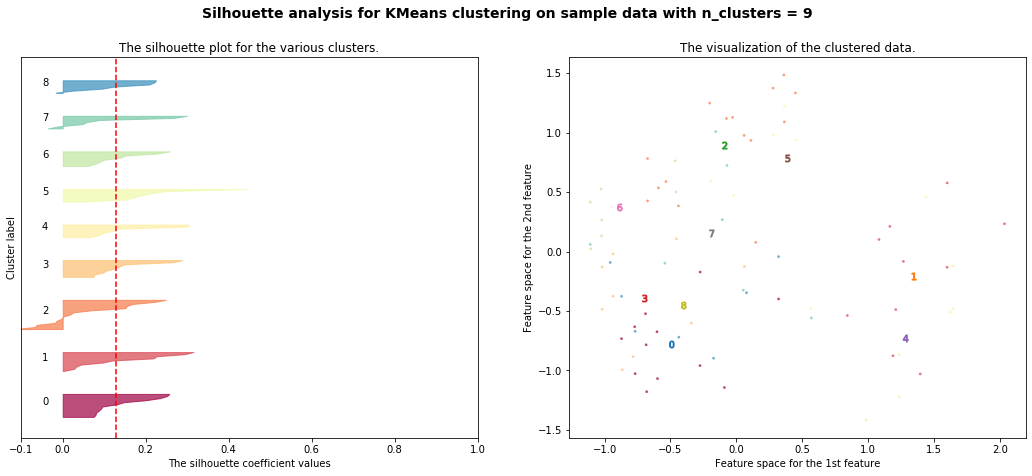

For n_clusters = 10 The average silhouette_score is : 0.1275702305042696
For n_clusters = 10 Number of negative silhouette_score is : 6


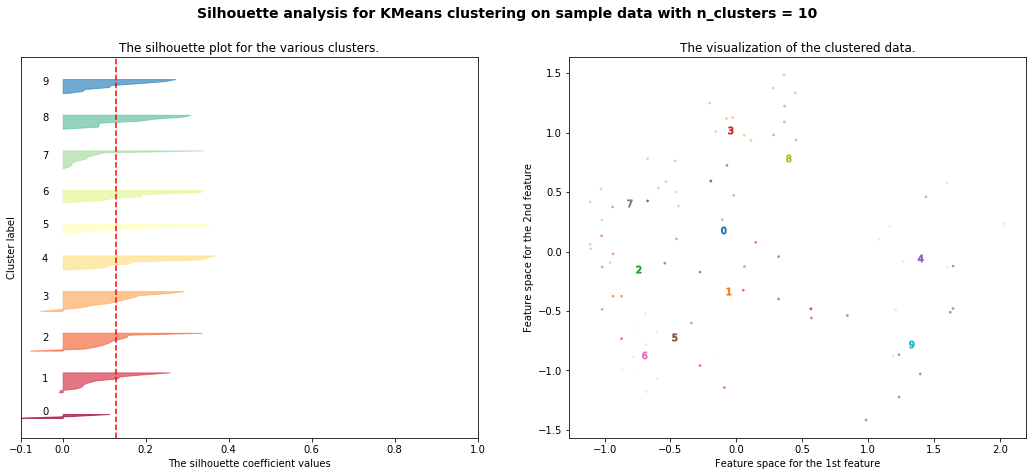

In [47]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_train_pca.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    neg_silhouette_score = 0

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=500)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    for sc in sample_silhouette_values:
        if sc < 0:
            neg_silhouette_score = neg_silhouette_score +1
    
    print("For n_clusters =", n_clusters,
          "Number of negative silhouette_score is :", neg_silhouette_score)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### From silhouette score and elbow method it can be concluded that optimal number of cluster is 2.
### For n_clusters = 2 and n_clusters = 4 the average silhouette_score is similar, still n_cluster = 2 can be considered as optimal because:
1) Their is only 1 difference in number of outlier in n_cluster = 2 and n_cluster = 2. For n_clusters = 2, number of negative silhouette_score is : 5 and for n_clusters = 4 Number of negative silhouette_score is : 4

2) Difference in silhouette score in both case is marginal, and hence I am considering n_cluster=2 as better. If we consider n_cluster = 4 as optimal, their will be not difference on SVC performance.

3) One can also argue that n_cluster = 2 will be computationally better, hence I am considering n_cluster=2 as optimal.


In [48]:
# Train final KMean model with optimal number of cluster.

In [49]:
kmean_optimal = KMeans(n_clusters=2, max_iter=500)
#kmean_optimal = KMeans(n_clusters=4, max_iter=500)
kmean_optimal.fit(X_train_pca)
prediction = kmean_optimal.predict(X_train_pca)
prediction

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

# 10. Create a new column in the train data and populate it with the cluster labels. 4 points

In [50]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.566095,-0.480976,-0.168070,0.872024,-0.445059,-0.312315,1.132519,-0.725667,-0.462625,0.563489
1,2.035878,0.233886,-0.176572,0.109622,-0.074935,-0.081212,0.165831,-0.282048,0.073360,-0.036294
2,0.059296,0.976739,-0.145843,-0.343804,0.208474,-1.250909,-0.424598,0.533587,-0.683303,-0.204607
3,0.147328,0.077655,1.051326,-0.316294,0.120719,0.026585,0.447094,-0.087111,0.861216,1.292629
4,1.268742,-0.082527,-0.034391,0.647286,-0.178048,0.503242,0.216876,0.824578,0.663189,0.641761


In [51]:
X_train_pca['PredictedLabel'] = prediction
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,PredictedLabel
0,0.566095,-0.480976,-0.168070,0.872024,-0.445059,-0.312315,1.132519,-0.725667,-0.462625,0.563489,0
1,2.035878,0.233886,-0.176572,0.109622,-0.074935,-0.081212,0.165831,-0.282048,0.073360,-0.036294,0
2,0.059296,0.976739,-0.145843,-0.343804,0.208474,-1.250909,-0.424598,0.533587,-0.683303,-0.204607,1
3,0.147328,0.077655,1.051326,-0.316294,0.120719,0.026585,0.447094,-0.087111,0.861216,1.292629,0
4,1.268742,-0.082527,-0.034391,0.647286,-0.178048,0.503242,0.216876,0.824578,0.663189,0.641761,0


#### Plot pairplot and boxplot after merging "PredictedLabel" for visualizing clusters

C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


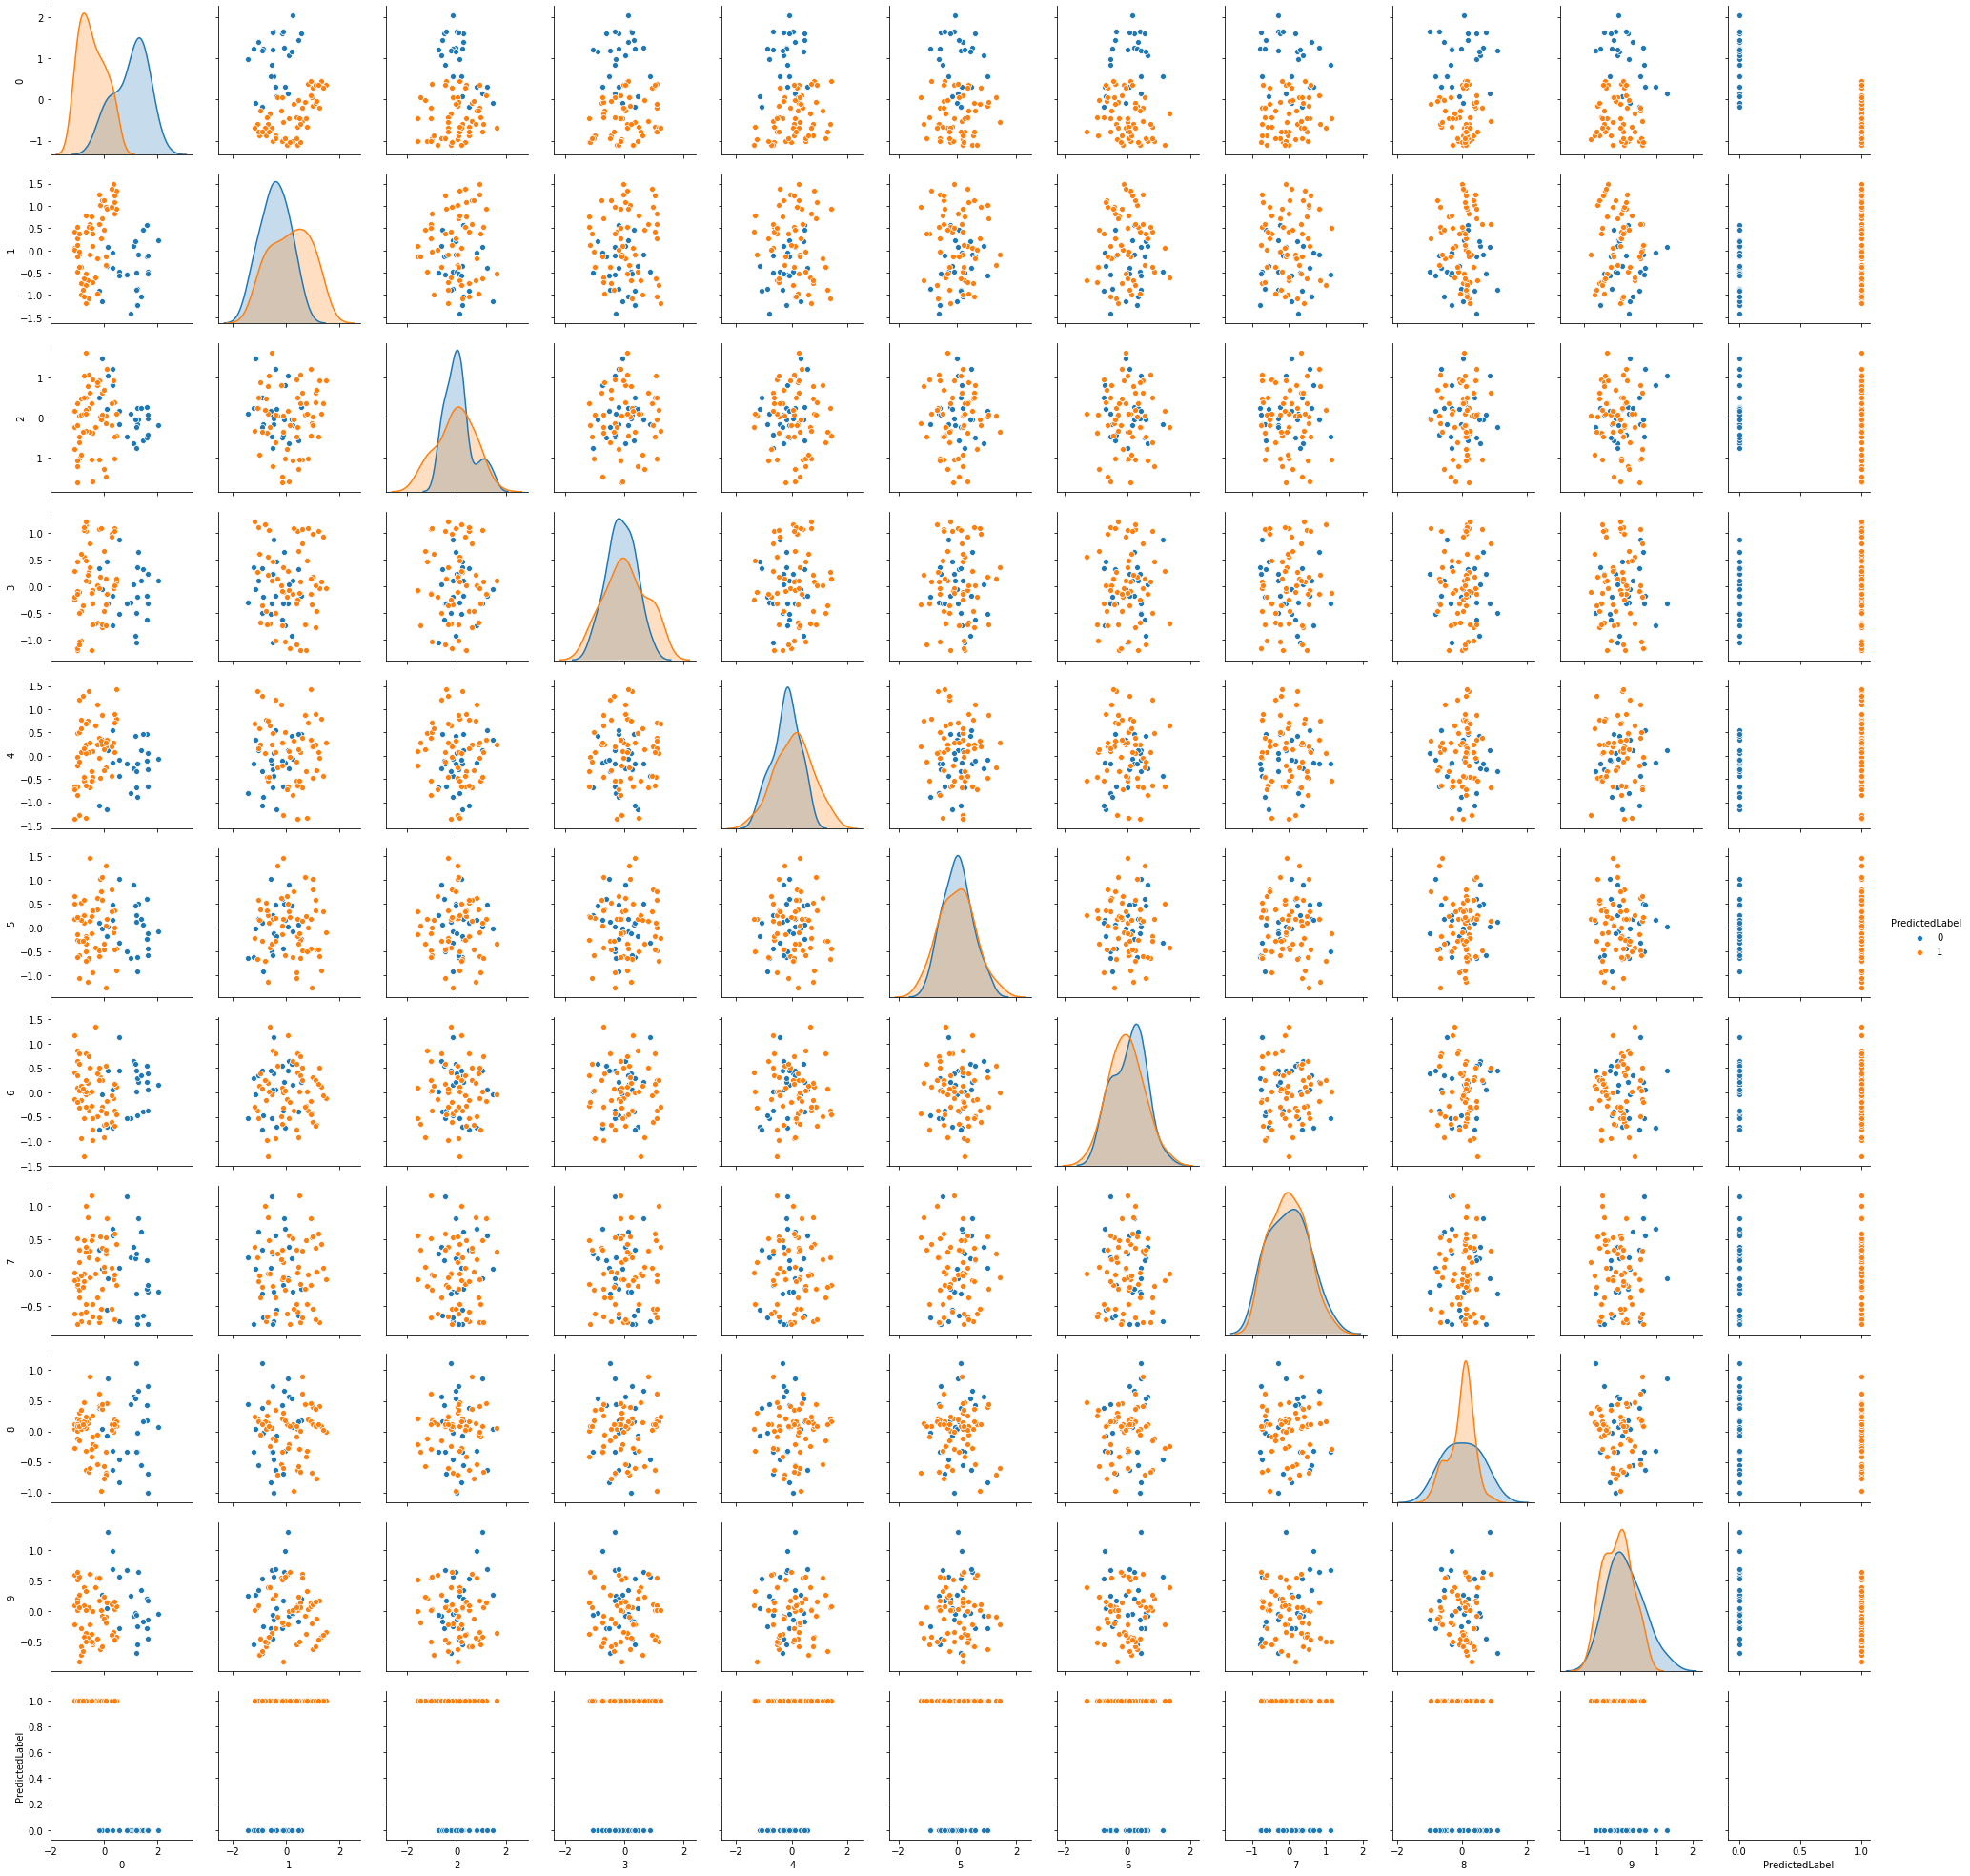

In [52]:
sns.pairplot(X_train_pca, diag_kind="kde",hue="PredictedLabel")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001730ECB5208>,
      dtype=object)

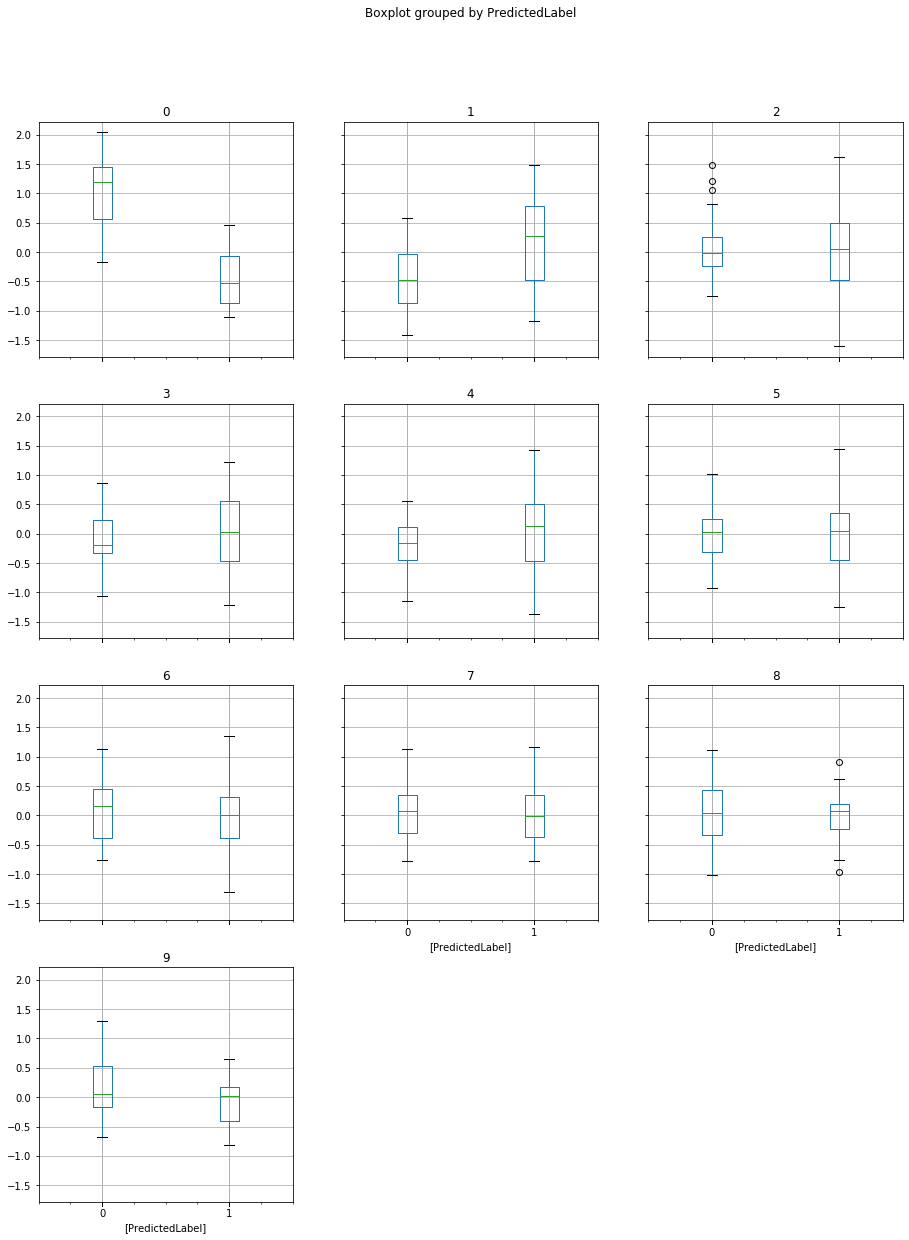

In [53]:
X_train_pca.boxplot(by="PredictedLabel", layout=(4,3), figsize=(15,20))

### From pairplot and boxplot we can conclude that clusters are overlapping. This may be due to overfitting. 

# 11. Transform the test data using the same PCA object that was fit on the train data. 4 points

In [54]:
X_test.head()

,P_0,P_1,P_2,P.1_0,P.1_1,P.1_2,A_0,A_1,A_2,A.1_0,A.1_1,A.1_2,A.2_0,A.2_1,A.2_2,P.2_0,P.2_1,P.2_2
65,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
41,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
40,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
74,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
214,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [55]:
X_test_pca = reduced_pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.004413,0.040272,0.494259,-0.032372,-1.063868,-0.792979,-0.803678,-0.508771,-0.191526,-0.778588
1,-0.110546,0.662183,0.506053,1.041283,-0.317634,0.297958,0.172008,0.072262,-1.050625,-0.486234
2,-0.049791,0.740041,1.191128,0.101459,0.051866,-0.590308,-0.222605,-0.574643,0.675725,-0.740703
3,-0.587577,0.498097,0.132717,-0.417658,0.010328,-0.473132,-0.583428,-1.236497,-0.268067,0.881532
4,0.073041,-0.022026,-0.230049,0.316865,-0.589877,0.090386,0.552989,0.157526,1.252751,-1.116551


# 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points

In [56]:
x_test_prediction = kmean_optimal.predict(X_test_pca)

In [57]:
x_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [58]:
X_test_pca["PredictedLabel"] = x_test_prediction

In [59]:
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,PredictedLabel
0,-0.004413,0.040272,0.494259,-0.032372,-1.063868,-0.792979,-0.803678,-0.508771,-0.191526,-0.778588,1
1,-0.110546,0.662183,0.506053,1.041283,-0.317634,0.297958,0.172008,0.072262,-1.050625,-0.486234,1
2,-0.049791,0.740041,1.191128,0.101459,0.051866,-0.590308,-0.222605,-0.574643,0.675725,-0.740703,1
3,-0.587577,0.498097,0.132717,-0.417658,0.010328,-0.473132,-0.583428,-1.236497,-0.268067,0.881532,1
4,0.073041,-0.022026,-0.230049,0.316865,-0.589877,0.090386,0.552989,0.157526,1.252751,-1.116551,1


#### Plot pairplot and boxplot after merging "PredictedLabel" for visualizing clusters

C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


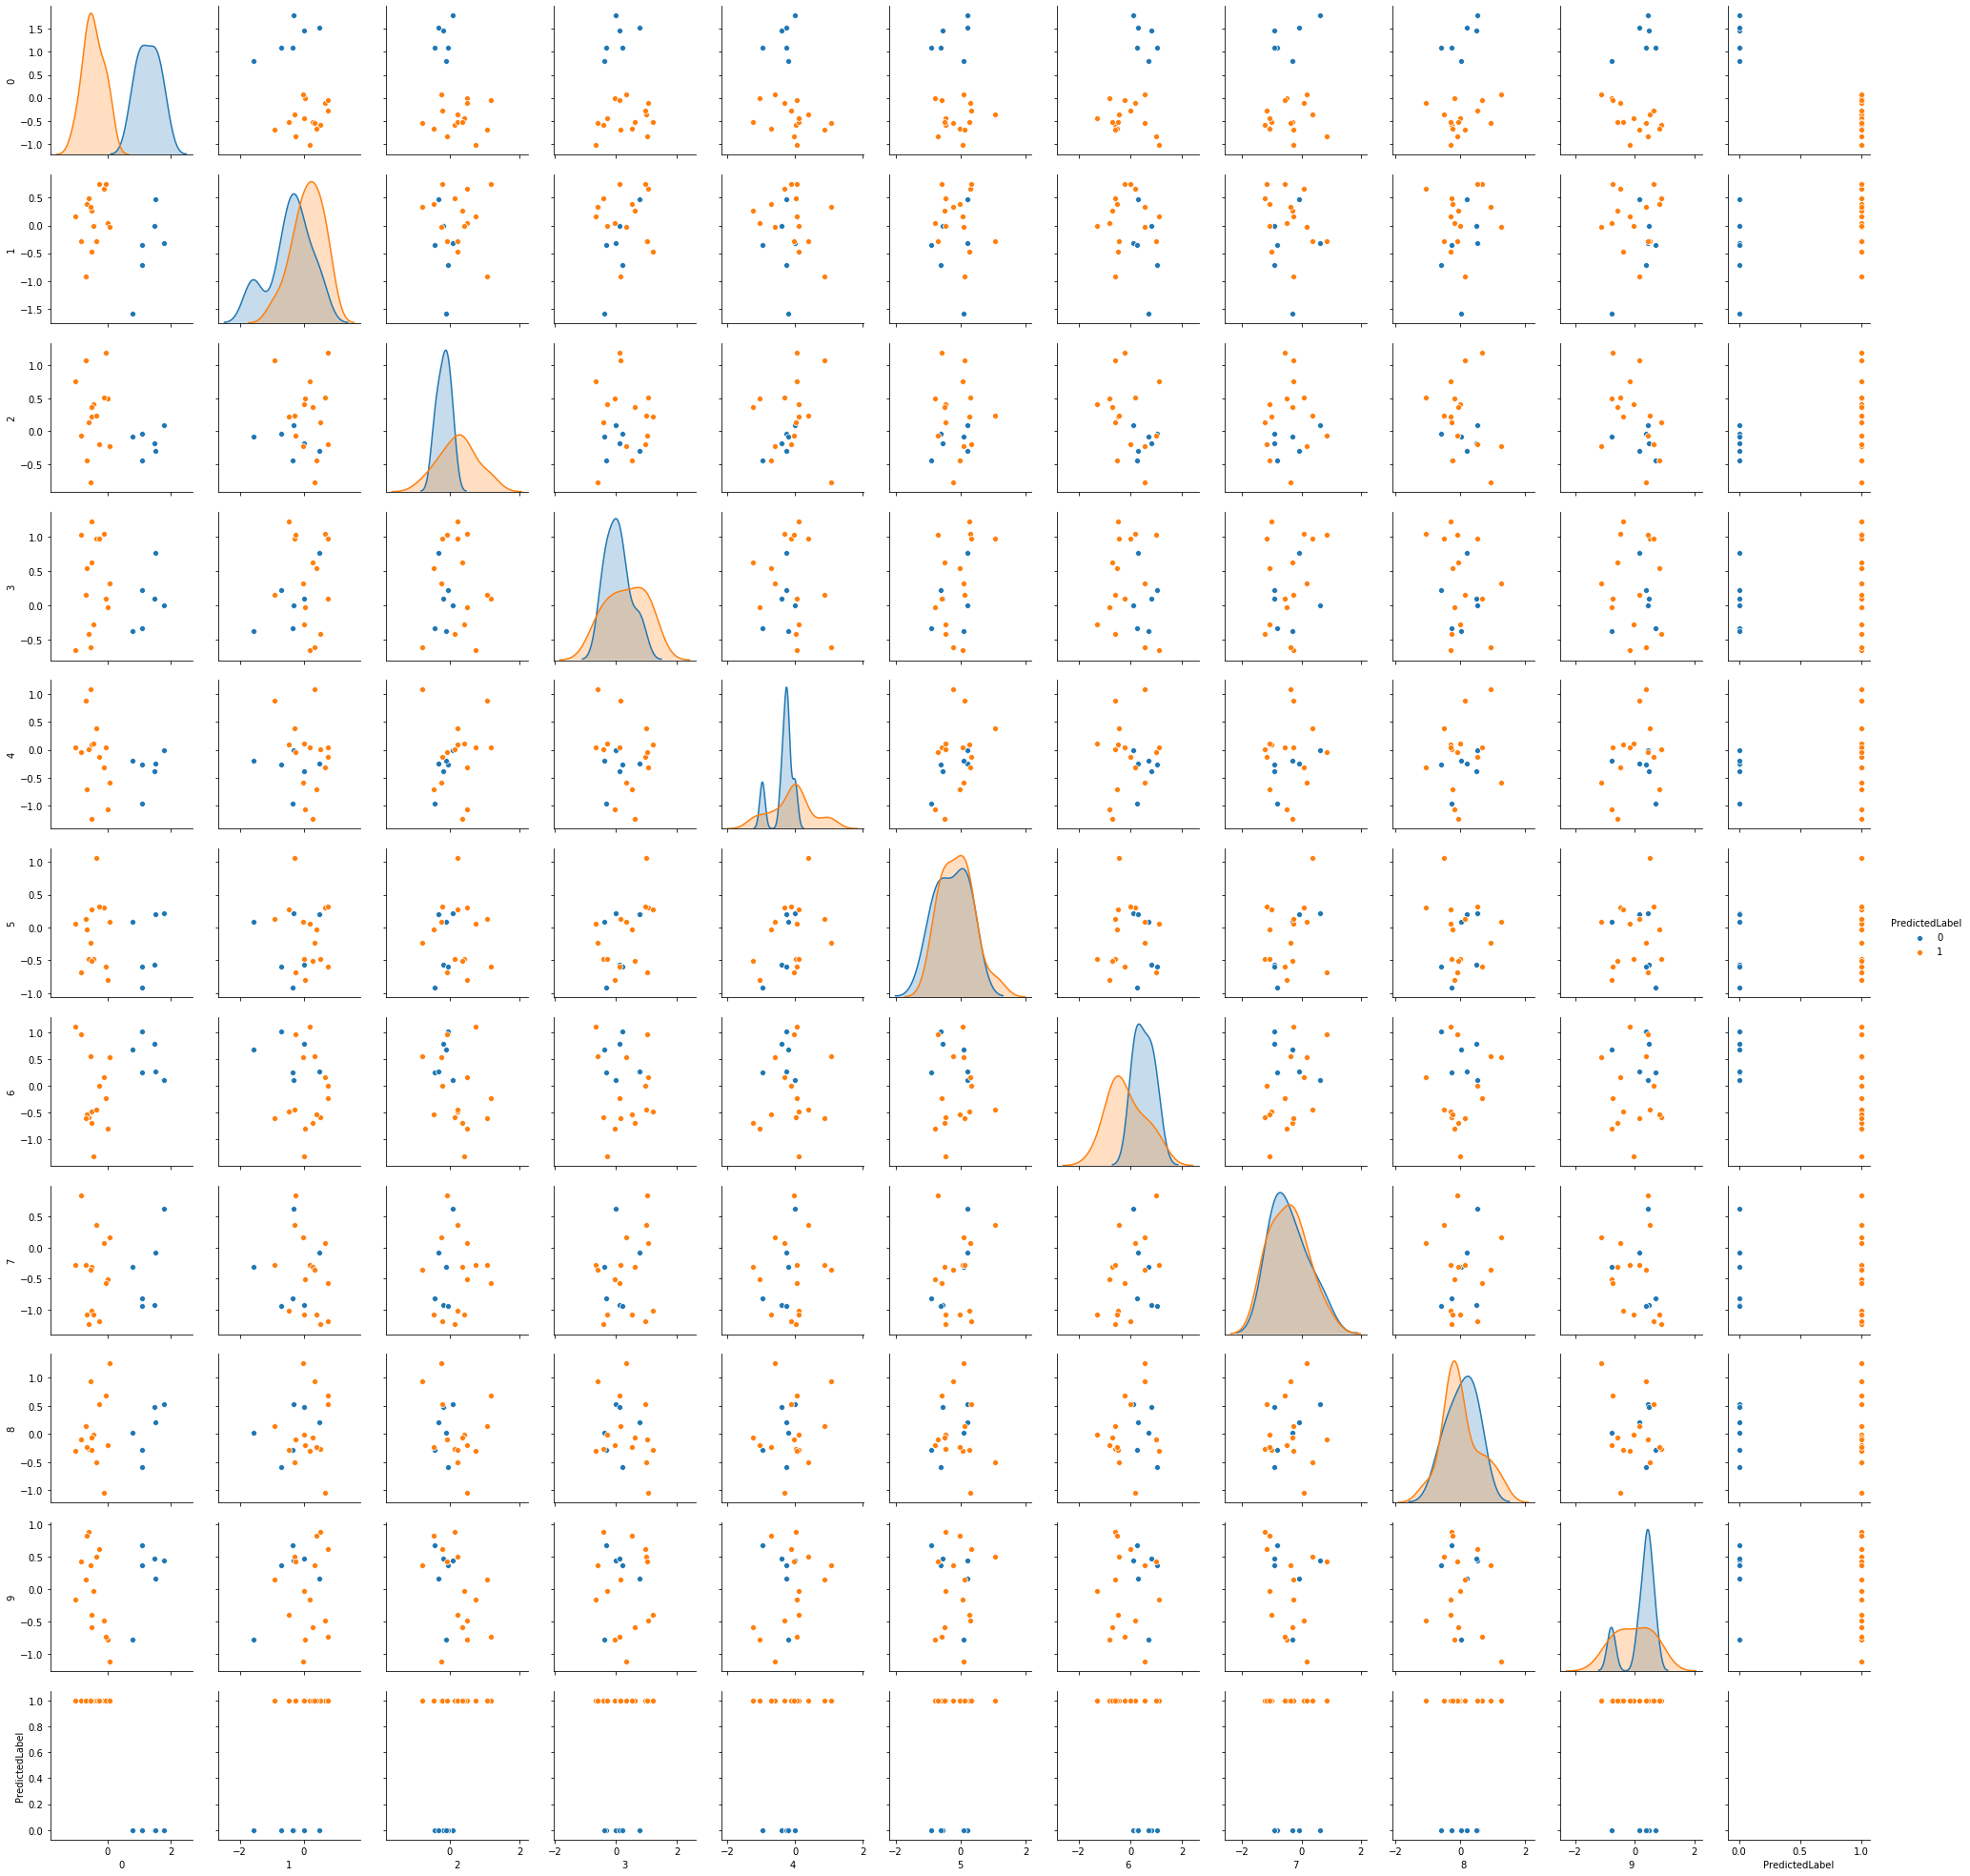

In [60]:
sns.pairplot(X_test_pca, diag_kind="kde", hue="PredictedLabel")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173172EC9E8>,
      dtype=object)

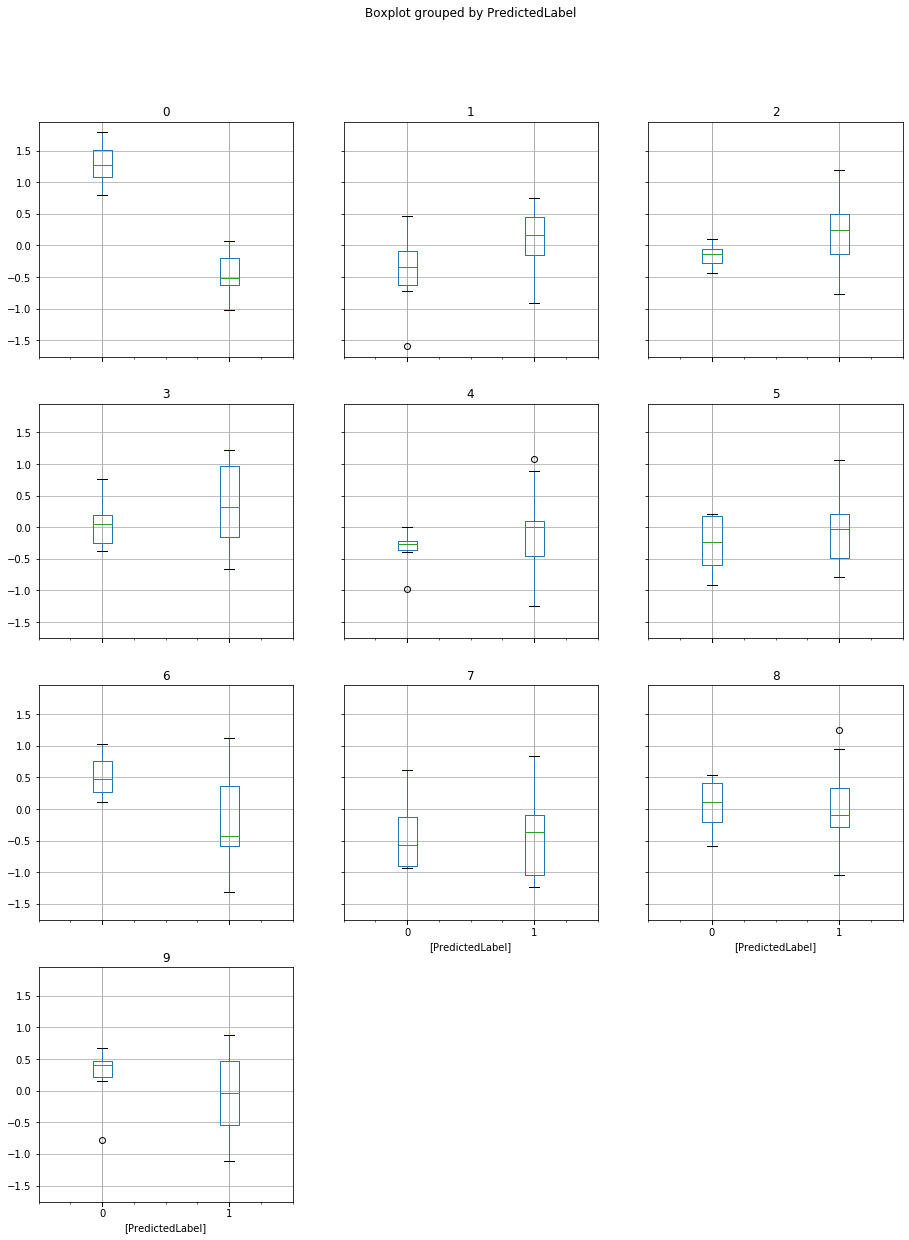

In [61]:
X_test_pca.boxplot(by="PredictedLabel", layout=(4,3), figsize=(15,20))

### From pairplot and boxplot we can conclude that clusters are overlapping. Similar observation seen while training.

# 13. Apply SVC model on train dataset and predict target for test dataset. 6 points

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [63]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,PredictedLabel
0,0.566095,-0.480976,-0.168070,0.872024,-0.445059,-0.312315,1.132519,-0.725667,-0.462625,0.563489,0
1,2.035878,0.233886,-0.176572,0.109622,-0.074935,-0.081212,0.165831,-0.282048,0.073360,-0.036294,0
2,0.059296,0.976739,-0.145843,-0.343804,0.208474,-1.250909,-0.424598,0.533587,-0.683303,-0.204607,1
3,0.147328,0.077655,1.051326,-0.316294,0.120719,0.026585,0.447094,-0.087111,0.861216,1.292629,0
4,1.268742,-0.082527,-0.034391,0.647286,-0.178048,0.503242,0.216876,0.824578,0.663189,0.641761,0


### "PredictedLabel": is included in X_train_pca and X_test_pca, which needs to be dropped before training SVC model.

In [64]:
# Drop "PredictedLabel" from X_train_pca
X_train_pca = X_train_pca.drop(["PredictedLabel"],axis=1)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.566095,-0.480976,-0.168070,0.872024,-0.445059,-0.312315,1.132519,-0.725667,-0.462625,0.563489
1,2.035878,0.233886,-0.176572,0.109622,-0.074935,-0.081212,0.165831,-0.282048,0.073360,-0.036294
2,0.059296,0.976739,-0.145843,-0.343804,0.208474,-1.250909,-0.424598,0.533587,-0.683303,-0.204607
3,0.147328,0.077655,1.051326,-0.316294,0.120719,0.026585,0.447094,-0.087111,0.861216,1.292629
4,1.268742,-0.082527,-0.034391,0.647286,-0.178048,0.503242,0.216876,0.824578,0.663189,0.641761


In [65]:
# Drop "PredictedLabel" from X_test_pca
X_test_pca = X_test_pca.drop(["PredictedLabel"], axis=1)
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.004413,0.040272,0.494259,-0.032372,-1.063868,-0.792979,-0.803678,-0.508771,-0.191526,-0.778588
1,-0.110546,0.662183,0.506053,1.041283,-0.317634,0.297958,0.172008,0.072262,-1.050625,-0.486234
2,-0.049791,0.740041,1.191128,0.101459,0.051866,-0.590308,-0.222605,-0.574643,0.675725,-0.740703
3,-0.587577,0.498097,0.132717,-0.417658,0.010328,-0.473132,-0.583428,-1.236497,-0.268067,0.881532
4,0.073041,-0.022026,-0.230049,0.316865,-0.589877,0.090386,0.552989,0.157526,1.252751,-1.116551


In [66]:
y_train = Le.fit_transform(y_train)
y_train

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [67]:
y_test = Le.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [68]:
# Apply KFold, k=10
Kfold = KFold(n_splits=10, random_state=10)

C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [69]:
# SVC classifier
svc = SVC()
C = [0.1,0.5,0.8,1,1.3,1.8,2]
kernal = ['linear', 'rbf', 'poly']
param_grid = dict(C=C,kernel=kernal)

In [70]:
grid_cv = GridSearchCV(estimator=svc, param_grid=param_grid, cv=Kfold,n_jobs=-1)
grid_result = grid_cv.fit(X_train_pca, y_train)
scv_prediction = grid_result.predict(X_test_pca)
scv_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [71]:
print("traning score: ",grid_result.score(X_train_pca, y_train))

traning score:  1.0


In [72]:
print("Best SVC parameters:{}".format(grid_result.best_params_))

Best SVC parameters:{'C': 0.5, 'kernel': 'linear'}


# 14. Check accuracy and confusion matrix. 2 point

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, scv_prediction))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.97        14

    accuracy                           0.95        21
   macro avg       0.97      0.93      0.94        21
weighted avg       0.96      0.95      0.95        21

